In [1]:
import statistics as stat

128


In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
r_oh_mull = stat.get_roh('/gpfs/scratch/smdick/mbpol/md_siesta/md_siesta_10', 10, 10, 10)
r_oh_mbpol = stat.get_roh('/gpfs/scratch/smdick/mbpol/nose_128_10', 4000, 20, 20)
r_oh_pure =  stat.get_roh('/gpfs/scratch/smdick/mbpol/md_siesta_pure/md_siesta_10', 10, 10, 10)
r_oh_fd =  stat.get_roh('/gpfs/scratch/smdick/md_siesta_descr_fd/md_siesta', 10, 10, 10)

/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
r_oo_mull = stat.get_roo('/gpfs/scratch/smdick/mbpol/md_siesta/md_siesta_10', 10, 10, 10)
r_oo_mbpol = stat.get_roo('/gpfs/scratch/smdick/mbpol/nose_128_10', 4000, 20, 20)
r_oo_pure =  stat.get_roo('/gpfs/scratch/smdick/mbpol/md_siesta_pure/md_siesta_10', 10, 10, 10)
r_oo_fd =  stat.get_roo('/gpfs/scratch/smdick/md_siesta_descr_fd/md_siesta', 10, 10, 10)

/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
r_hh_mull = stat.get_rhh('/gpfs/scratch/smdick/mbpol/md_siesta/md_siesta_10', 10, 10, 10)
r_hh_mbpol = stat.get_rhh('/gpfs/scratch/smdick/mbpol/nose_128_10', 4000, 20, 20)
r_hh_pure =  stat.get_rhh('/gpfs/scratch/smdick/mbpol/md_siesta_pure/md_siesta_10', 10, 10, 10)
r_hh_fd =  stat.get_rhh('/gpfs/scratch/smdick/md_siesta_descr_fd/md_siesta', 10, 10, 10)

/gpfs/home/smdick/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


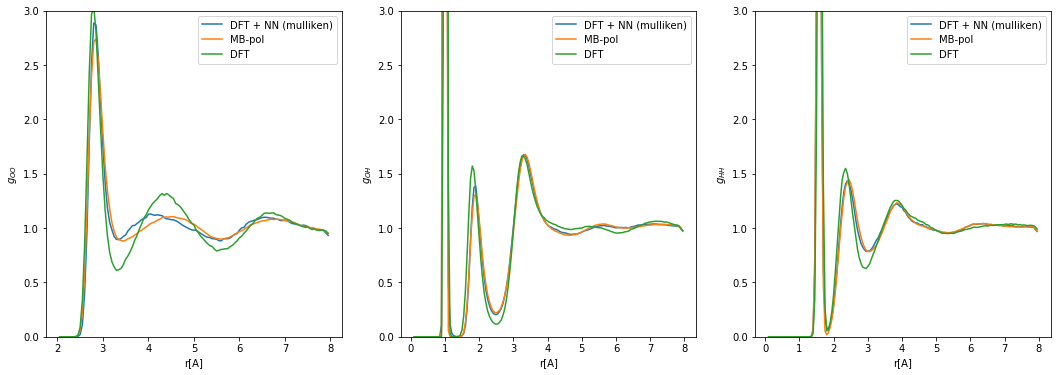

In [6]:
r_oo_list = [r_oo_mull, r_oo_mbpol, r_oo_pure, r_oo_fd]
r_oh_list = [r_oh_mull, r_oh_mbpol, r_oh_pure, r_oh_fd]
r_hh_list = [r_hh_mull, r_hh_mbpol, r_hh_pure, r_hh_fd]

labels = ['DFT + NN (mulliken)', 'MB-pol', 'DFT', 'DFT + NN (FD)']
figsize(18,6)
bins1 = np.arange(2,8,0.05)[1:]
bins2 = np.arange(0,8,0.05)[1:]
for i, [data,bins,div, t] in enumerate(zip([r_oo_list, r_oh_list, r_hh_list],
                                        [bins1,bins2,bins2],
                                        [1,4,2],
                                        ['OO', 'OH', 'HH'])):
    
    subplot(1,3,i+1)
    for r_oo, l  in zip(data[:3], labels[:3]):
        plot(bins, np.mean(r_oo, axis = 0)/div, label = l)
    ylim(0,3.0)
    xlabel('r[A]')
    ylabel('$g_{' + t + '}$' )
    legend()

# savefig('rdfs.eps')
# savefig('rdfs.pdf')